# Setting

가상환경 설정 후 라이브러리/패키지 설치

pip install spacy

pip install pandas

pip install numpy

pip install matplotlib

pip install seaborn

pip install nltk

pip install scikit-learn

pip install ml_things

pip install tqdm

pip install torch

pip install konlpy

pip install hyperopt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import json
import sklearn
import zipfile
import shutil

from sklearn.model_selection import train_test_split

## data load 및 dataframe 저장

In [ ]:
train_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\영석s project\\낚시성 기사 탐지\\part2 train' # part1, part2, total - 총 3번 진행

data = []

# zip 파일을 푸는 부분
for filename in os.listdir(train_data_dir):

  # zip 파일인 경우만 접근
  if filename.endswith('.zip'):
    zip_file_path = os.path.join(train_data_dir, filename)
    temp_dir = os.path.join(train_data_dir, 'temp_dir')
    os.makedirs(temp_dir, exist_ok=True)

    with zipfile.ZipFile(zip_file_path, 'r') as z:
        z.extractall(temp_dir)

    # temp_dir 내의 모든 파일에 대해 반복
    for file in os.listdir(temp_dir):
      file_path = os.path.join(temp_dir, file)
      if file.endswith('.json'):
        with open(file_path, 'r', encoding='utf-8') as j:
            # JSON 파일 읽기
            json_data = json.load(j)
            # 1. 낚시/비낚시 2. 제목 불일치/본문 맥락 불일치
            ## 1., 2.에 따라 source / labeled 데이터에서 가져올 내용이 달라짐
            ## 데이터 구축 활용 가이드라인의 3. 어노테이션 포맷 참고!
            source_data_info = json_data["sourceDataInfo"]
            labeled_data_info = json_data["labeledDataInfo"]
            
            if source_data_info["useType"] == 1:
              data.append({
                  "newsTitle": source_data_info["newsTitle"],
                  "newsContent": source_data_info["newsContent"],
                  "partNum": source_data_info["partNum"],
                  "processType": source_data_info["processType"],
                  "processPattern": source_data_info["processPattern"],
                  "useType": source_data_info["useType"]
              })
            elif source_data_info["partNum"] == 'P1':
                data.append({
                    "newsTitle": labeled_data_info["newTitle"],
                    "newsContent": source_data_info["newsContent"],
                    "partNum": source_data_info["partNum"],
                    "processType": source_data_info["processType"],
                    "processPattern": source_data_info["processPattern"],
                    "useType": source_data_info["useType"]
                })
            else:
                # sentenceContent 모으기
                joined_sentence_content = ' '.join(item["sentenceContent"] for item in labeled_data_info["processSentenceInfo"])
                
                data.append({
                    "newsTitle": source_data_info["newsTitle"],
                    "newsContent": joined_sentence_content,
                    "partNum": source_data_info["partNum"],
                    "processType": source_data_info["processType"],
                    "processPattern": source_data_info["processPattern"],
                    "useType": source_data_info["useType"]
                })

    # 임시 디렉토리 삭제
    shutil.rmtree(temp_dir)

In [ ]:
test_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\영석s project\\낚시성 기사 탐지\\part2 test'

test_data = []

# zip 파일을 푸는 부분
for filename in os.listdir(test_data_dir):

    # zip 파일인 경우만 접근
    if filename.endswith('.zip'):
        zip_file_path = os.path.join(test_data_dir, filename)
        temp_dir = os.path.join(test_data_dir, 'temp_dir')
        os.makedirs(temp_dir, exist_ok=True)

        with zipfile.ZipFile(zip_file_path, 'r') as z:
            z.extractall(temp_dir)

        # temp_dir 내의 모든 파일에 대해 반복
        for file in os.listdir(temp_dir):
            file_path = os.path.join(temp_dir, file)
            if file.endswith('.json'):
                with open(file_path, 'r', encoding='utf-8') as j:
                    # JSON 파일 읽기
                    json_data = json.load(j)
                    # 1. 낚시/비낚시 2. 제목 불일치/본문 맥락 불일치
                    ## 1., 2.에 따라 source / labeled 데이터에서 가져올 내용이 달라짐
                    ## 데이터 구축 활용 가이드라인의 3. 어노테이션 포맷 참고!
                    source_data_info = json_data["sourceDataInfo"]
                    labeled_data_info = json_data["labeledDataInfo"]
                    
                    if source_data_info["useType"] == 1:
                        test_data.append({
                            "newsTitle": source_data_info["newsTitle"],
                            "newsContent": source_data_info["newsContent"],
                            "partNum": source_data_info["partNum"],
                            "processType": source_data_info["processType"],
                            "processPattern": source_data_info["processPattern"],
                            "useType": source_data_info["useType"]
                        })
                    elif source_data_info["partNum"] == 'P1':
                        test_data.append({
                            "newsTitle": labeled_data_info["newTitle"],
                            "newsContent": source_data_info["newsContent"],
                            "partNum": source_data_info["partNum"],
                            "processType": source_data_info["processType"],
                            "processPattern": source_data_info["processPattern"],
                            "useType": source_data_info["useType"]
                        })
                    else:
                        # sentenceContent 모으기
                        joined_sentence_content = ' '.join(item["sentenceContent"] for item in labeled_data_info["processSentenceInfo"])
                        
                        test_data.append({
                            "newsTitle": source_data_info["newsTitle"],
                            "newsContent": joined_sentence_content,
                            "partNum": source_data_info["partNum"],
                            "processType": source_data_info["processType"],
                            "processPattern": source_data_info["processPattern"],
                            "useType": source_data_info["useType"]
                        })

        # 임시 디렉토리 삭제
        shutil.rmtree(temp_dir)

### part1

In [ ]:
p1_train_df = pd.DataFrame(data)
p1_train_df

,newsTitle,newsContent,partNum,processType,processPattern,useType
0,'친환경 금융 목표'…'탄소중립' 실천 나선 금융업계,"\""사죄한다.\"" 운전기사들에게 허구한 날 폭언을 퍼부어 윤리 문제가 불거진 이장한...",P1,A,99,0
1,"LG생활건강, 사상 최대 실적에도 주가 반등은 '글쎄'","한국기업지배구조원이 8월 31일 국내 상장회사의 환경경영(E), 사회책임경영(S),...",P1,A,99,0
2,"한숨만 쉬는 유통업계, 매출 얼마나 줄었나 봤더니…","런던 현지 시각으로 7일, 스탠다드앤푸어스 다우존스 인디시즈와 로베코샘이 다우존스지...",P1,A,99,0
3,"무협 “IPEF, 공급망 및 무역투자처 확보 수단으로 활용해야”",한국생산성본부(회장 홍순직)는 9월 7일 '2017 다우존스 지속가능경영지수'(Do...,P1,A,99,0
4,"KB국민은행, '기업 고객 맞춤형' 디지털 금융서비스 개편",한국교직원공제회는 13일 운영위원회를 열어 스튜어드십 코드를 도입하기로 결정했다.\...,P1,A,99,0
...,...,...,...,...,...,...
81438,"이재명 '박완주 제명' 민주당 조치에 \""공감한다\""",더불어민주당 이재명 상임고문은 13일 성 비위 의혹으로 박완주 의원을 제명한 민주당...,P1,A,00,1
81439,文 모호한 ‘검수완박’ 메시지로 혼란 가중,문재인 대통령이 18일 김오수 검찰총장을 면담하며 더불어민주당과 검찰의 대화를 독려...,P1,A,00,1
81440,이재명 “억울한 사람 없는 ‘공정한 사회’ 만들 것”,더불어민주당 원로들은 13일 이재명 대선 후보에게 덕담을 건네며 정권 재창출을 위한...,P1,A,00,1
81441,홍준표 46.4% VS 이재명 37.7%… 홍준표 43.3% VS 이낙연 40.0%,홍준표 국민의힘 의원이 이재명 경기도지사와 가상 양자 대결에서 앞서는 것으로 나타났...,P1,A,00,1


In [ ]:
# 'useType(낚시성 여부)'에 따른 클래스 별 데이터 개수 카운트
p1_train_df['useType'].value_counts()

useType
1    40826
0    40617
Name: count, dtype: int64

In [ ]:
# 데이터프레임 피클 파일로 내보내기
p1_train_df.to_pickle('C:\\Users\\dssal\\OneDrive\\바탕 화면\\영석s project\\낚시성 기사 탐지\\p1_train_df.pickle')

In [ ]:
p1_test_df = pd.DataFrame(test_data)
p1_test_df

,newsTitle,newsContent,partNum,processType,processPattern,useType
0,공동주택 하자분쟁 조정 본격화,"최종구 금융위원회 위원장이 \""'임팩트금융(사회적금융)'의 안착 차원에서 정부가 직...",P1,A,99,0
1,"로봇청소기 강자 코오롱글로벌, '드리미 W10' 국내 론칭",요즘 프로보노 형 사회 공헌 활동을 펴는 회사가 늘고 있다.\n회사를 경영하거나 기...,P1,A,99,0
2,'공공성보다 수익' 코레일의 꼼수,"송종욱 광주은행 행장이 취임 후 첫인사를 앞두고 \""능력에 따라 공정한 인사를 할 ...",P1,A,99,0
3,2018년부터 010번호 강제통합,박태진 SK주식회사 IR담당 상무는 16일 개최된 'ESG 우수기업 시상식 및 심포...,P1,A,99,0
4,대전 ‘계룡건설’ㆍ충남‘경남기업’시공능력평가 1위,한미약품이 국내 제약 업계 최초로 부패 방지 경영 시스템 국제 표준 ISO37001...,P1,A,99,0
...,...,...,...,...,...,...
10175,"文 대통령, 26∼27일 아세안 화상회의 참석",문재인 대통령이 오는 26일부터 이틀간 아세안 관련 정상회의에 화상으로 참석한다.\...,P1,A,00,1
10176,尹정부 11일 첫 당정협의… ‘손실보상 추경’ 논의 [윤석열정부 용산지대],윤석열정부가 출범과 동시에 코로나19로 피해를 본 소상공인 손실보상을 위한 추가경정...,P1,A,00,1
10177,‘이재명을 보호하라’ 벽보 등장…민주당사 앞에서 어떤 일이,이재명 더불어민주당 상임고문을 지지하는 것으로 보이는 누리꾼들의 결집력이 온·오프라...,P1,A,00,1
10178,"태영호 “尹 대북정책, 원칙·실용 노선 모두 가져갈 것”",국민의힘 태영호 의원이 윤석열 대통령 당선인이 권영세 의원을 통일부 장관 후보자로 ...,P1,A,00,1


In [ ]:
# 'useType(낚시성 여부)'에 따른 클래스 별 데이터 개수 카운트
p1_test_df['useType'].value_counts()

useType
1    5103
0    5077
Name: count, dtype: int64

In [ ]:
### part1 + part2
p1_test_df.to_pickle('C:\\Users\\dssal\\OneDrive\\바탕 화면\\영석s project\\낚시성 기사 탐지\\p1_test_df.pickle')

### part2

In [ ]:
p2_train_df = pd.DataFrame(data)
p2_train_df

,newsTitle,newsContent,partNum,processType,processPattern,useType
0,'우린 가맹점에 대한 사회적 책임을 준수합니다',가맹점에 대한 사회적 책임을 활동을 펴는 가맹점 본부들이 늘어나고 있다. 김상조 공...,P2,A,99,0
1,"최흥식 금감원장, 기업 CSR 활동 공시 추진, 전망은?","\""최흥식 금융감독원장이 지난 11일 취임식 인터뷰에서 기업 공시 항목에 '기업의 ...",P2,A,99,0
2,정부 왜 사회적경제에 매달리나?,정부는 왜 사회적 경제에 매달리나? 그 답은 간단하다. 바로 일자리 때문이다. 19...,P2,A,99,0
3,"국내 연기금, SRI 활성화 조짐... 해외는?","국민연금공단, 사립학교교직원연금공단 등 공적 연기금이 사회책임투자(SRI)에 관심을...",P2,A,99,0
4,"모두를 위한 'e스포츠', 개발부터 페스티벌까지...",e스포츠의 '장애인 배제 시대'는 끝났다. 장애인이 e스포츠를 마음껏 즐길 수 있도...,P2,A,99,0
...,...,...,...,...,...,...
81518,신지예 영입한 김한길 “20∼30 여성서 특정 후보 지지 결정 못한 분 가장 많아”,국민의힘 윤석열 대선 후보의 직속 기구인 새시대준비위원회를 이끄는 김한길 위원장은 ...,P2,A,00,1
81519,"이재오 “MB 잡아간 건 文의 ‘정치 보복’, 尹·韓은 하라니까 했던 것”",이재오 국민의힘 상임고문은 29일 이명박 전 대통령 수사와 기소는 모두 문재인 전 ...,P2,A,00,1
81520,"윤호중 \""이재명에 보선 출마 요청? 현재까진 검토 안해\""",더불어민주당 윤호중 비상대책위원장은 3일 당이 대선후보였던 이재명 전 경기지사의 국...,P2,A,00,1
81521,"강득구 “대장동 개발, 시민에 이익 귀속시킨 성공 사례”",더불어민주당 이재명 대선 경선 후보의 성남시장 시절 대장동 개발사업을 둘러싼 의혹과...,P2,A,00,1


In [ ]:
# 'useType(낚시성 여부)'에 따른 클래스 별 데이터 개수 카운트
p2_train_df['useType'].value_counts()

useType
0    40797
1    40726
Name: count, dtype: int64

In [ ]:
# 데이터프레임 피클 파일로 내보내기
p2_train_df.to_pickle('C:\\Users\\dssal\\OneDrive\\바탕 화면\\영석s project\\낚시성 기사 탐지\\p2_train_df.pickle')

In [ ]:
p2_test_df = pd.DataFrame(test_data)
p2_test_df

,newsTitle,newsContent,partNum,processType,processPattern,useType
0,윤리 이슈로 곤욕 프랜차이즈업계 사회책임에 혼신,윤리 이슈로 곤욕을 치른 프랜차이즈 업계가 사회 책임 활동에 온 힘을 다하고 있다....,P2,A,99,0
1,"산업발전법 통과, 기업 지속가능경영 환경 급변 예고",자유한국당 홍일표 의원의 기업의 지속가능경영 촉진을 위해 대표 발의한 `산업발전법 ...,P2,A,99,0
2,"참여연대 \""영화 관람료 인상 철회하라\"" VS. CGV \""부득이한 인상\""","참여연대가 CJ CGV의 영화 관람료 1천 원 인상에 대해 \""당장 철회하라\""고 ...",P2,A,99,0
3,"정부, \""가상통화 금융안정성에 위협, 국제적 규제 필요\""",정부가 가상통화가 금융 안정성에 위협이 될 수 있는 것은 물론 지속가능성과 확장성에...,P2,A,99,0
4,삼성전자·반올림 '반도체 백혈병' 10년의 싸움 막 내릴까,삼성전자와 시민단체 반올림의 '반도체 백혈병' 갈등이 종지부를 찍게 됐다. 삼성전자...,P2,A,99,0
...,...,...,...,...,...,...
10186,"이재명 “경제는 생태계, 풀밭이 죽으면 호랑이도 죽는다”","이재명 더불어민주당 대선 후보는 24일 \""중소기업이 강한 경제, 중소기업 종사자도...",P2,A,00,1
10187,"윤석열 \""광주, 마음의 고향 같은 곳…확실하게 바꿔놓겠다\""","국민의힘 윤석열 대선 후보는 6일 \""광주를 발전시켜 나가면서 국민의힘도 함께 변화...",P2,A,00,1
10188,"“숭고한 희생 헛되지 않도록”… 한 총리, 제2연평해전·천안함 희생자 추모",한덕수 국무총리는 현충일을 이틀 앞둔 4일 오전 경기 평택에 있는 해군 제2함대사령...,P2,A,00,1
10189,김건희 큐레이터 경력 아예 없었나? 미술관 직원들 “본 적 없어”,윤석열 국민의힘 대선후보의 배우자 김건희씨가 자신의 허위 경력 논란에 관해 대국민 ...,P2,A,00,1


In [ ]:
# 'useType(낚시성 여부)'에 따른 클래스 별 데이터 개수 카운트
p2_test_df['useType'].value_counts()

useType
0    5100
1    5091
Name: count, dtype: int64

In [ ]:
### part1 + part2
p2_test_df.to_pickle('C:\\Users\\dssal\\OneDrive\\바탕 화면\\영석s project\\낚시성 기사 탐지\\p2_test_df.pickle')

### part1 + part2

In [ ]:
train_df = pd.DataFrame(data)
train_df

,newsTitle,newsContent,partNum,processType,processPattern,useType
0,'친환경 금융 목표'…'탄소중립' 실천 나선 금융업계,"\""사죄한다.\"" 운전기사들에게 허구한 날 폭언을 퍼부어 윤리 문제가 불거진 이장한...",P1,A,99,0
1,"LG생활건강, 사상 최대 실적에도 주가 반등은 '글쎄'","한국기업지배구조원이 8월 31일 국내 상장회사의 환경경영(E), 사회책임경영(S),...",P1,A,99,0
2,"한숨만 쉬는 유통업계, 매출 얼마나 줄었나 봤더니…","런던 현지 시각으로 7일, 스탠다드앤푸어스 다우존스 인디시즈와 로베코샘이 다우존스지...",P1,A,99,0
3,"무협 “IPEF, 공급망 및 무역투자처 확보 수단으로 활용해야”",한국생산성본부(회장 홍순직)는 9월 7일 '2017 다우존스 지속가능경영지수'(Do...,P1,A,99,0
4,"KB국민은행, '기업 고객 맞춤형' 디지털 금융서비스 개편",한국교직원공제회는 13일 운영위원회를 열어 스튜어드십 코드를 도입하기로 결정했다.\...,P1,A,99,0
...,...,...,...,...,...,...
162961,신지예 영입한 김한길 “20∼30 여성서 특정 후보 지지 결정 못한 분 가장 많아”,국민의힘 윤석열 대선 후보의 직속 기구인 새시대준비위원회를 이끄는 김한길 위원장은 ...,P2,A,00,1
162962,"이재오 “MB 잡아간 건 文의 ‘정치 보복’, 尹·韓은 하라니까 했던 것”",이재오 국민의힘 상임고문은 29일 이명박 전 대통령 수사와 기소는 모두 문재인 전 ...,P2,A,00,1
162963,"윤호중 \""이재명에 보선 출마 요청? 현재까진 검토 안해\""",더불어민주당 윤호중 비상대책위원장은 3일 당이 대선후보였던 이재명 전 경기지사의 국...,P2,A,00,1
162964,"강득구 “대장동 개발, 시민에 이익 귀속시킨 성공 사례”",더불어민주당 이재명 대선 경선 후보의 성남시장 시절 대장동 개발사업을 둘러싼 의혹과...,P2,A,00,1


In [ ]:
# 'useType(낚시성 여부)'에 따른 클래스 별 데이터 개수 카운트
train_df['useType'].value_counts()

useType
1    81552
0    81414
Name: count, dtype: int64

In [ ]:
# 데이터프레임 피클 파일로 내보내기
train_df.to_pickle('C:\\Users\\dssal\\OneDrive\\바탕 화면\\영석s project\\낚시성 기사 탐지\\train_df.pickle')

In [ ]:
test_df = pd.DataFrame(test_data)
test_df

,newsTitle,newsContent,partNum,processType,processPattern,useType
0,공동주택 하자분쟁 조정 본격화,"최종구 금융위원회 위원장이 \""'임팩트금융(사회적금융)'의 안착 차원에서 정부가 직...",P1,A,99,0
1,"로봇청소기 강자 코오롱글로벌, '드리미 W10' 국내 론칭",요즘 프로보노 형 사회 공헌 활동을 펴는 회사가 늘고 있다.\n회사를 경영하거나 기...,P1,A,99,0
2,'공공성보다 수익' 코레일의 꼼수,"송종욱 광주은행 행장이 취임 후 첫인사를 앞두고 \""능력에 따라 공정한 인사를 할 ...",P1,A,99,0
3,2018년부터 010번호 강제통합,박태진 SK주식회사 IR담당 상무는 16일 개최된 'ESG 우수기업 시상식 및 심포...,P1,A,99,0
4,대전 ‘계룡건설’ㆍ충남‘경남기업’시공능력평가 1위,한미약품이 국내 제약 업계 최초로 부패 방지 경영 시스템 국제 표준 ISO37001...,P1,A,99,0
...,...,...,...,...,...,...
20366,"이재명 “경제는 생태계, 풀밭이 죽으면 호랑이도 죽는다”","이재명 더불어민주당 대선 후보는 24일 \""중소기업이 강한 경제, 중소기업 종사자도...",P2,A,00,1
20367,"윤석열 \""광주, 마음의 고향 같은 곳…확실하게 바꿔놓겠다\""","국민의힘 윤석열 대선 후보는 6일 \""광주를 발전시켜 나가면서 국민의힘도 함께 변화...",P2,A,00,1
20368,"“숭고한 희생 헛되지 않도록”… 한 총리, 제2연평해전·천안함 희생자 추모",한덕수 국무총리는 현충일을 이틀 앞둔 4일 오전 경기 평택에 있는 해군 제2함대사령...,P2,A,00,1
20369,김건희 큐레이터 경력 아예 없었나? 미술관 직원들 “본 적 없어”,윤석열 국민의힘 대선후보의 배우자 김건희씨가 자신의 허위 경력 논란에 관해 대국민 ...,P2,A,00,1


In [ ]:
# 'useType(낚시성 여부)'에 따른 클래스 별 데이터 개수 카운트
test_df['useType'].value_counts()

useType
1    10194
0    10177
Name: count, dtype: int64

In [ ]:
test_df.to_pickle('C:\\Users\\dssal\\OneDrive\\바탕 화면\\영석s project\\낚시성 기사 탐지\\test_df.pickle')

### data loading 다시 할 때

In [1]:
import pandas as pd
import pickle

train_df = pd.read_pickle("C:\\Users\\USER\\Desktop\\영석's project\\데이터셋\\train_df.pickle")
test_df = pd.read_pickle("C:\\Users\\USER\\Desktop\\영석's project\\데이터셋\\test_df.pickle")

p1_train_df = pd.read_pickle("C:\\Users\\USER\\Desktop\\영석's project\\데이터셋\\p1_train_df.pickle")
p1_test_df = pd.read_pickle("C:\\Users\\USER\\Desktop\\영석's project\\데이터셋\\p1_test_df.pickle")

p2_train_df = pd.read_pickle("C:\\Users\\USER\\Desktop\\영석's project\\데이터셋\\p2_train_df.pickle")
p2_test_df = pd.read_pickle("C:\\Users\\USER\\Desktop\\영석's project\\데이터셋\\p2_test_df.pickle")

# Data split
> ai hub 데이터셋은 인공지능 성능 표준화를 위해 학습/테스트 데이터셋 분리시켜놓음

> 즉, 생략

# EDA

In [2]:
train_df

,newsTitle,newsContent,partNum,processType,processPattern,useType
0,'친환경 금융 목표'…'탄소중립' 실천 나선 금융업계,"\""사죄한다.\"" 운전기사들에게 허구한 날 폭언을 퍼부어 윤리 문제가 불거진 이장한...",P1,A,99,0
1,"LG생활건강, 사상 최대 실적에도 주가 반등은 '글쎄'","한국기업지배구조원이 8월 31일 국내 상장회사의 환경경영(E), 사회책임경영(S),...",P1,A,99,0
2,"한숨만 쉬는 유통업계, 매출 얼마나 줄었나 봤더니…","런던 현지 시각으로 7일, 스탠다드앤푸어스 다우존스 인디시즈와 로베코샘이 다우존스지...",P1,A,99,0
3,"무협 “IPEF, 공급망 및 무역투자처 확보 수단으로 활용해야”",한국생산성본부(회장 홍순직)는 9월 7일 '2017 다우존스 지속가능경영지수'(Do...,P1,A,99,0
4,"KB국민은행, '기업 고객 맞춤형' 디지털 금융서비스 개편",한국교직원공제회는 13일 운영위원회를 열어 스튜어드십 코드를 도입하기로 결정했다.\...,P1,A,99,0
...,...,...,...,...,...,...
162961,신지예 영입한 김한길 “20∼30 여성서 특정 후보 지지 결정 못한 분 가장 많아”,국민의힘 윤석열 대선 후보의 직속 기구인 새시대준비위원회를 이끄는 김한길 위원장은 ...,P2,A,00,1
162962,"이재오 “MB 잡아간 건 文의 ‘정치 보복’, 尹·韓은 하라니까 했던 것”",이재오 국민의힘 상임고문은 29일 이명박 전 대통령 수사와 기소는 모두 문재인 전 ...,P2,A,00,1
162963,"윤호중 \""이재명에 보선 출마 요청? 현재까진 검토 안해\""",더불어민주당 윤호중 비상대책위원장은 3일 당이 대선후보였던 이재명 전 경기지사의 국...,P2,A,00,1
162964,"강득구 “대장동 개발, 시민에 이익 귀속시킨 성공 사례”",더불어민주당 이재명 대선 경선 후보의 성남시장 시절 대장동 개발사업을 둘러싼 의혹과...,P2,A,00,1


In [3]:
train_df['useType'].value_counts() # 클래스 간 비율 차이 거의 없음

useType
1    81552
0    81414
Name: count, dtype: int64

In [4]:
test_df

,newsTitle,newsContent,partNum,processType,processPattern,useType
0,공동주택 하자분쟁 조정 본격화,"최종구 금융위원회 위원장이 \""'임팩트금융(사회적금융)'의 안착 차원에서 정부가 직...",P1,A,99,0
1,"로봇청소기 강자 코오롱글로벌, '드리미 W10' 국내 론칭",요즘 프로보노 형 사회 공헌 활동을 펴는 회사가 늘고 있다.\n회사를 경영하거나 기...,P1,A,99,0
2,'공공성보다 수익' 코레일의 꼼수,"송종욱 광주은행 행장이 취임 후 첫인사를 앞두고 \""능력에 따라 공정한 인사를 할 ...",P1,A,99,0
3,2018년부터 010번호 강제통합,박태진 SK주식회사 IR담당 상무는 16일 개최된 'ESG 우수기업 시상식 및 심포...,P1,A,99,0
4,대전 ‘계룡건설’ㆍ충남‘경남기업’시공능력평가 1위,한미약품이 국내 제약 업계 최초로 부패 방지 경영 시스템 국제 표준 ISO37001...,P1,A,99,0
...,...,...,...,...,...,...
20366,"이재명 “경제는 생태계, 풀밭이 죽으면 호랑이도 죽는다”","이재명 더불어민주당 대선 후보는 24일 \""중소기업이 강한 경제, 중소기업 종사자도...",P2,A,00,1
20367,"윤석열 \""광주, 마음의 고향 같은 곳…확실하게 바꿔놓겠다\""","국민의힘 윤석열 대선 후보는 6일 \""광주를 발전시켜 나가면서 국민의힘도 함께 변화...",P2,A,00,1
20368,"“숭고한 희생 헛되지 않도록”… 한 총리, 제2연평해전·천안함 희생자 추모",한덕수 국무총리는 현충일을 이틀 앞둔 4일 오전 경기 평택에 있는 해군 제2함대사령...,P2,A,00,1
20369,김건희 큐레이터 경력 아예 없었나? 미술관 직원들 “본 적 없어”,윤석열 국민의힘 대선후보의 배우자 김건희씨가 자신의 허위 경력 논란에 관해 대국민 ...,P2,A,00,1


In [5]:
test_df['useType'].value_counts() # 클래스 간 비율 차이 거의 없음

useType
1    10194
0    10177
Name: count, dtype: int64

In [6]:
part1 = p1_train_df['useType'].value_counts()
part2 = p2_train_df['useType'].value_counts()
part_all = train_df['useType'].value_counts()

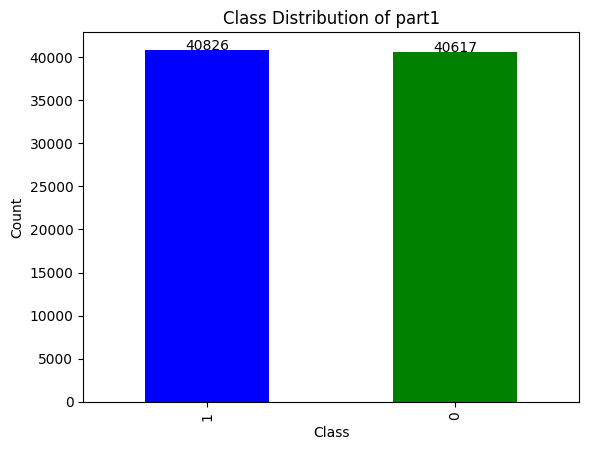

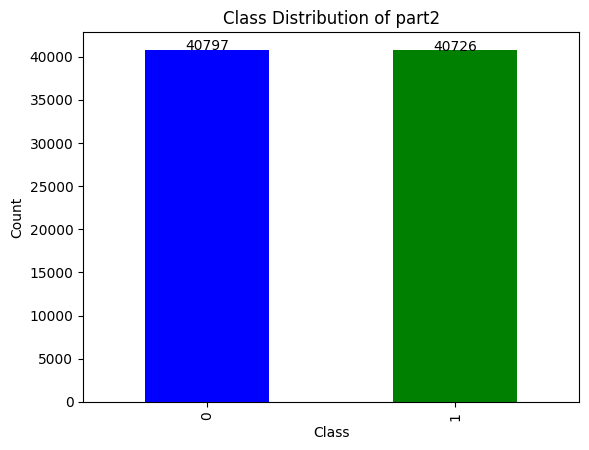

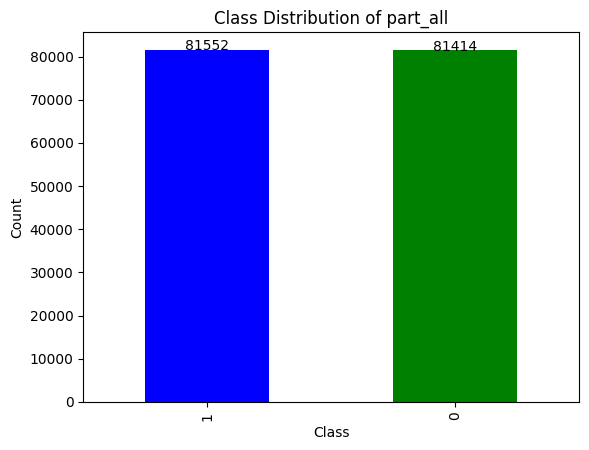

In [7]:
import matplotlib.pyplot as plt

def visualize_class_distribution(class_counts, title):
    # 클래스 별 데이터 수를 막대그래프로 시각화
    ax = class_counts.plot(kind='bar', color=['blue', 'green'])
    plt.title(f'Class Distribution of {title}')
    plt.xlabel('Class')
    plt.ylabel('Count')

    # 각 막대 위에 데이터 수 표시
    for i, count in enumerate(class_counts):
        ax.text(i, count + 0.1, str(count), ha='center')

    plt.show()

visualize_class_distribution(part1 , 'part1')
visualize_class_distribution(part2, 'part2')
visualize_class_distribution(part_all, 'part_all')

### 기사 데이터 직접 확인

In [8]:
train_df["newsContent"][0]

'\\"사죄한다.\\" 운전기사들에게 허구한 날 폭언을 퍼부어 윤리 문제가 불거진 이장한 종근당 회장은 3일 경찰에 피의자로 소환돼 조사받은 뒤 귀가하면서 이런 말을 남겼다.\n이날 서울경찰청 광역수사대에 따르면 지난 2일 오전 10시께 광수대에 출석했던 그는 16시간 30분 만인 이날 오전 2시 30분께 광수대를 빠져나가면서 \\"면목 없다. 진심으로 다시 한번 사죄한다. 마음에 상처를 입은 사람들에게 위로를 보낸다\\"라고 사죄의 뜻을 표했다.\n그는 운전기사에게 막말한 이유에 대해 \\"조사 과정에서 다 설명했다\\"라고 조사 내용에 대해선 말을 아꼈다.\n지난 2일 경찰을 나올 때도 그는 \\"열심히 일하려고 노력했다\\"라며 혐의 내용에 대해선 제대로 답하지 않았다.\n그는 회장직 유지에 대해선 \\"고민하고 있다\\"라고 대답했다.\n이 회장은 출석 13시간 35분 만인 지난 2일 오후 11시 35분께 조사가 끝났지만 변호인과 함께 조서를 검토하느라 귀가가 늦었다.\n이 회장은 전직 운전기사 4명에게 폭언하고 불법 운전을 지시한 혐의(강요)다.\n의사 처방이 있어야 얻을 수 있는 발기 부전 치료제를 접대를 위해 활용해 약사법을 위반한 혐의도 받고 있다.\n경찰은 진술 내용을 살펴 그를 재소환하거나 구속영장을 신청할 계획이다.'

# Data Processing

In [11]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
kiwi = Kiwi()
stopwords = Stopwords()

In [14]:
test_list = kiwi.tokenize("과학기술연합대학원대학교(UST)와 코스닥협회가 ‘제4회 코스닥협회-UST 연구개발(R&D) 인사관리 세미나’를 30일 서울 롯데월드타워에서 개최했다.", stopwords=stopwords)
for t in test_list:
    print(t[0], t[1])

과학기술연합대학원대학교 NNP
UST SL
코스닥 NNG
협회 NNG
4 SN
회 NNB
코스닥 NNG
협회 NNG
UST SL
연구 NNG
개발 NNG
R SL
D SL
인사 NNG
관리 NNG
세미나 NNG
30 SN
서울 NNP
롯데월드타워 NNP
개최 NNG


In [16]:
def preprocessing(document):
    # 텍스트 정제 (형태소 분석)
    clean_words = []
    token_list = kiwi.tokenize(document, stopwords=stopwords) # 불용어 제거
    for token in token_list:
        # 일반명사/고유명사 + 동사 + 형용사 + 일반 부사 + 감탄사 + 어근 + 알파벳 추출
        if token[1] in ['NNG', 'NNP', 'VV', 'VA', 'MAG', 'IC', 'XR', 'SL']:
            clean_words.append(token[0])
    document = ' '.join(clean_words)

    return document

In [17]:
from tqdm import tqdm
tqdm.pandas()
train_df["newsTitle"] = train_df["newsTitle"].progress_apply(preprocessing)
train_df["newsContent"] = train_df["newsContent"].progress_apply(preprocessing)

100%|██████████| 162966/162966 [2:33:32<00:00, 17.69it/s]  


In [18]:
test_df["newsTitle"] = test_df["newsTitle"].progress_apply(preprocessing)
test_df["newsContent"] = test_df["newsContent"].progress_apply(preprocessing)

100%|██████████| 20371/20371 [19:46<00:00, 17.17it/s]


In [19]:
sample_1 = "시간과 정신의 방에 갖혔다ㅎㅎ are somebody there~??"
sample_prepro_1 = preprocessing(sample_1)

print(sample_prepro_1)

sample_2 = "kkkkkkk 난 컴퓨터 세상이 재밌어~~"
sample_prepro_2 = preprocessing(sample_2)

print(sample_prepro_2)
print(len(sample_prepro_2))

시간 정신 방 갖혔다 are somebody there
kkkkkkk 컴퓨터 세상 재밌
17


In [20]:
train_df.to_pickle("part_all_kiwi_train.pickle")
test_df.to_pickle("part_all_kiwi_test.pickle")

In [21]:
"""
spacy_prepro_train_df = pd.read_pickle("C:\\Users\\USER\\Desktop\\영석's project\\part_all_prepro_spaCy_train.pickle")
spacy_prepro_test_df = pd.read_pickle("C:\\Users\\USER\\Desktop\\영석's project\\part_all_prepro_spaCy_test.pickle")
"""
test_df.head()

,newsTitle,newsContent,partNum,processType,processPattern,useType
0,공동 주택 하자 분쟁 조정 본격,최종 구 금융 위원회 위원장 임팩트 금융 사회 금융 안착 차원 정부 직접 기금 만들...,P1,A,99,0
1,로봇 청소기 강자 코오롱글로벌 드리미 W 국내 론칭,요즘 프로보노 사회 공헌 활동 펴 회사 늘 회사 경영 기업 갖추 능력 공익 차원 무...,P1,A,99,0
2,공공 수익 코레일 꼼수,송 종 욱 광주은행 행장 취임 후 인사 앞두 능력 공정 인사 거듭 약속 송 은행장 ...,P1,A,99,0
3,호 강제 통합,박태진 SK 주식회사 IR 담당 상무 개최 ESG 우수 기업 시상식 및 심포지엄 S...,P1,A,99,0
4,대전 계룡 건설 충남 경남기업 시공 능력 평가,한미약품 국내 제약 업계 최초 부패 방지 경영 시스템 국제 표준 ISO 인증 ISO...,P1,A,99,0


In [23]:
train_df['combined_news'] = train_df["newsTitle"] + ' ' + train_df["newsContent"]
test_df["combined_news"] = test_df["newsTitle"] + ' ' + test_df["newsContent"]

In [24]:
x_train = train_df["combined_news"]
y_train = train_df["useType"]

x_test = test_df["combined_news"]
y_test = test_df["useType"]

In [25]:
# part1, 2 df 구축
train_df_p1 = train_df[train_df["partNum"] == "P1"]
train_df_p2 = train_df[train_df["partNum"] == "P2"]

In [26]:
print('train_df_p1["partNum"]:', train_df_p1["partNum"].unique())
print('train_df_p2["partNum"]:', train_df_p2["partNum"].unique())

train_df_p1["partNum"]: ['P1']
train_df_p2["partNum"]: ['P2']


In [27]:
# part1
x_train_p1 = train_df_p1["combined_news"]
y_train_p1 = train_df_p1["useType"]

# part2
x_train_p2 = train_df_p2["combined_news"]
y_train_p2 = train_df_p2["useType"]

# Feature extraction & Modelling

In [28]:
# tfidf embedding - part all
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer='word', ngram_range=(1,3), max_features=3000)
x_train_pa_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_pa_tfidf = tfidf_vectorizer.transform(x_test)

In [29]:
# tfidf embedding - part1
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer='word', ngram_range=(1,3), max_features=3000)
x_train_p1_tfidf = tfidf_vectorizer.fit_transform(x_train_p1)
# test 데이터는 part all로 앙상블을 실시할 것이기 때문에 생략

In [30]:
# tfidf embedding - part2
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df = 0.0, analyzer='word', ngram_range=(1,3), max_features=3000)
x_train_p2_tfidf = tfidf_vectorizer.fit_transform(x_train_p2)
# test 데이터는 part all로 앙상블을 실시할 것이기 때문에 생략

### grid_search(tfidf) & test data Inference

In [31]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from lightgbm import LGBMClassifier

# gridsearch
def evaluate_model(model, params, x_tfidf_train, y_train, x_tfidf_test, y_test, model_name, vector_name):

    grid = GridSearchCV(model, param_grid=params, return_train_score=True, cv=5, refit=True)
    grid.fit(x_tfidf_train, y_train)
    validation_accuray = grid.best_score_
    best_model = grid.best_estimator_

    pred_y_test = best_model.predict(x_tfidf_test)

    test_accuracy = accuracy_score(y_test, pred_y_test)

    print(f"{model_name} ({vector_name}) validation accuracy: {validation_accuray:.4f}")
    print(f"{model_name} ({vector_name}) test accuracy: {test_accuracy:.4f}")

    return [validation_accuray, test_accuracy, pred_y_test]


In [32]:
models = [
    #(LogisticRegression(n_jobs=-1, random_state=77), {"max_iter": [1000, 1500, 2000], "C": [3, 5, 7], "penalty": ['l2']}),
    (LGBMClassifier(n_jobs=-1, random_state=77), {'num_leaves': [25, 50, 75], 'max_depth': [10, 20, 30], 'min_data_in_leaf': [20, 30, 40]})]

In [33]:
# Part All - GridSearCV & Inference 값 저장
pa_predictions = {}
pa_validation_accuray = {}
pa_test_accuracy = {}
for model, params in models:
    model_name = model.__class__.__name__
    evaluations = evaluate_model(model, params, x_train_pa_tfidf, y_train, x_test_pa_tfidf, y_test, model_name, "tfidf for Part All")

    # 모델 이름을 키로 하여 성능 저장
    pa_validation_accuray[model_name] = evaluations[0]
    pa_test_accuracy[model_name] = evaluations[1]
    pa_predictions[model_name] = evaluations[2]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 65241, number of negative: 65131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.681714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 761867
[LightGBM] [Info] Number of data points in the train set: 130372, number of used features: 3000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500422 -> initscore=0.001687
[LightGBM] [Info] Start training from score 0.001687
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 wil

In [35]:
# Part 1 - GridSearCV & Inference 값 저장
p1_predictions = {}
p1_validation_accuray = {}
p1_test_accuracy = {}
for model, params in models:
    model_name = model.__class__.__name__
    evaluations = evaluate_model(model, params, x_train_p1_tfidf, y_train_p1, x_test_pa_tfidf, y_test, model_name, "tfidf for Part1")

    # 모델 이름을 키로 하여 성능 저장
    p1_validation_accuray[model_name] = evaluations[0]
    p1_test_accuracy[model_name] = evaluations[1]
    p1_predictions[model_name] = evaluations[2]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 32661, number of negative: 32493
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.077328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 725156
[LightGBM] [Info] Number of data points in the train set: 65154, number of used features: 3000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501289 -> initscore=0.005157
[LightGBM] [Info] Start training from score 0.005157
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will

In [34]:
# Part 2 - GridSearCV & Inference 값 저장
p2_predictions = {}
p2_validation_accuray = {}
p2_test_accuracy = {}
for model, params in models:
    model_name = model.__class__.__name__
    evaluations = evaluate_model(model, params, x_train_p2_tfidf, y_train_p2, x_test_pa_tfidf, y_test, model_name, "tfidf for Part2")

    # 모델 이름을 키로 하여 성능 저장
    p2_validation_accuray[model_name] = evaluations[0]
    p2_test_accuracy[model_name] = evaluations[1]
    p2_predictions[model_name] = evaluations[2]

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 32581, number of negative: 32637
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.986651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722481
[LightGBM] [Info] Number of data points in the train set: 65218, number of used features: 3000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499571 -> initscore=-0.001717
[LightGBM] [Info] Start training from score -0.001717
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 wi

# Results

### Confusion Matrix

In [36]:
# confusion matric
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_confusion_matrix(y_true, y_pred, model_name, vector_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.title(f"Confusion Matrix for {model_name} ({vector_name})")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

=== Confusion Matrices ===


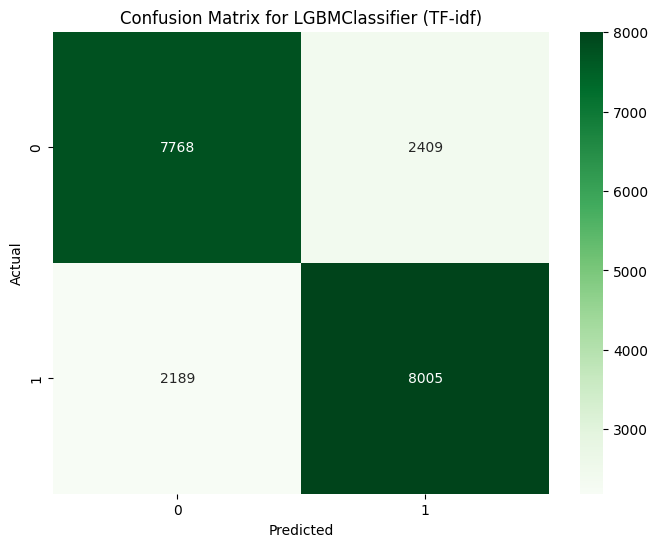

In [37]:
cmap_colors = {"LogisticRegression": "Blues", "LGBMClassifier": "Greens"}

# Part All  - confusion matrix 출력
print("=== Confusion Matrices ===")
for model_name, pred_y_test in pa_predictions.items():
    print_confusion_matrix(y_test, pred_y_test, model_name, "TF-idf")

=== Confusion Matrices ===


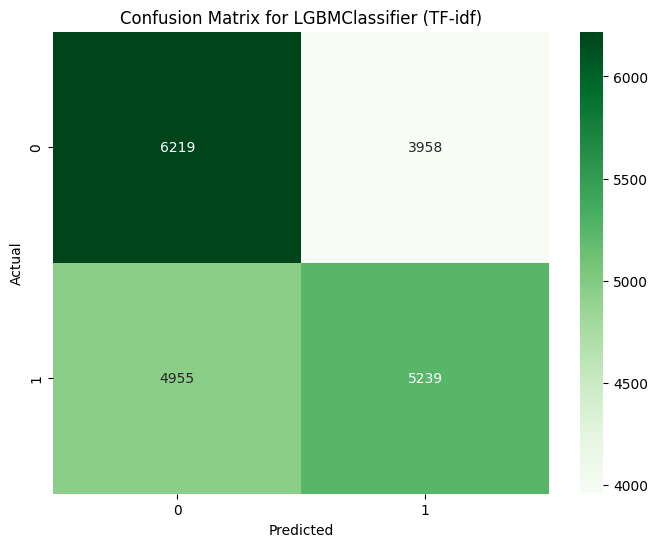

In [38]:
cmap_colors = {"LogisticRegression": "Blues", "LGBMClassifier": "Greens"}

# Part1 - confusion matrix 출력
print("=== Confusion Matrices ===")
for model_name, pred_y_test in p1_predictions.items():
    print_confusion_matrix(y_test, pred_y_test, model_name, "TF-idf")

=== Confusion Matrices ===


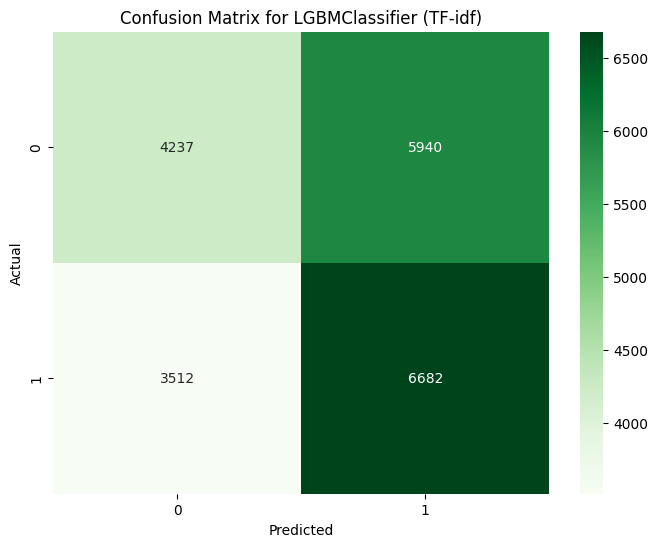

In [39]:
cmap_colors = {"LogisticRegression": "Blues", "LGBMClassifier": "Greens"}

# Part2 - confusion matrix 출력
print("=== Confusion Matrices ===")
for model_name, pred_y_test in p2_predictions.items():
    print_confusion_matrix(y_test, pred_y_test, model_name, "TF-idf")

### classification_report

In [40]:
from sklearn import metrics

# Part All
def print_classification_report(y_true, y_pred, model_name, vector_name):
    report = metrics.classification_report(y_true, y_pred)
    print(f"{model_name} ({vector_name}) - Classification Report:")
    print(f"validation_accuray: {pa_validation_accuray[model_name]}\ntest_accuracy: {pa_test_accuracy[model_name]}\n{report}")
    print()
    
# classification report 출력
print("=== Classification Reports ===")
for model_name, pred_y_test in pa_predictions.items():
    print_classification_report(y_test, pred_y_test, model_name, "TF-idf")

=== Classification Reports ===
LGBMClassifier (TF-idf) - Classification Report:
validation_accuray: 0.7217145770689051
test_accuracy: 0.7742869765843601
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     10177
           1       0.77      0.79      0.78     10194

    accuracy                           0.77     20371
   macro avg       0.77      0.77      0.77     20371
weighted avg       0.77      0.77      0.77     20371




In [41]:
# Part1 
def print_classification_report(y_true, y_pred, model_name, vector_name):
    report = metrics.classification_report(y_true, y_pred)
    print(f"{model_name} ({vector_name}) - Classification Report:")
    print(f"validation_accuray: {p1_validation_accuray[model_name]}\ntest_accuracy: {p1_test_accuracy[model_name]}\n{report}")
    print()
    
# classification report 출력
print("=== Classification Reports ===")
for model_name, pred_y_test in p1_predictions.items():
    print_classification_report(y_test, pred_y_test, model_name, "TF-idf")

=== Classification Reports ===
LGBMClassifier (TF-idf) - Classification Report:
validation_accuray: 0.6389832250565999
test_accuracy: 0.5624662510431496
              precision    recall  f1-score   support

           0       0.56      0.61      0.58     10177
           1       0.57      0.51      0.54     10194

    accuracy                           0.56     20371
   macro avg       0.56      0.56      0.56     20371
weighted avg       0.56      0.56      0.56     20371




In [42]:
# Part2
def print_classification_report(y_true, y_pred, model_name, vector_name):
    report = metrics.classification_report(y_true, y_pred)
    print(f"{model_name} ({vector_name}) - Classification Report:")
    print(f"validation_accuray: {p2_validation_accuray[model_name]}\ntest_accuracy: {p2_test_accuracy[model_name]}\n{report}")
    print()
    
# classification report 출력
print("=== Classification Reports ===")
for model_name, pred_y_test in p2_predictions.items():
    print_classification_report(y_test, pred_y_test, model_name, "TF-idf")

=== Classification Reports ===
LGBMClassifier (TF-idf) - Classification Report:
validation_accuray: 0.6599832716864698
test_accuracy: 0.5360070688724167
              precision    recall  f1-score   support

           0       0.55      0.42      0.47     10177
           1       0.53      0.66      0.59     10194

    accuracy                           0.54     20371
   macro avg       0.54      0.54      0.53     20371
weighted avg       0.54      0.54      0.53     20371




### final result(ansemble)

In [43]:
# majority voting - weighted

w_votes = []

for model_name, pred_y_test in pa_predictions.items():
     w_votes.append(pred_y_test)
     w_votes.append(p1_predictions[model_name])
     w_votes.append(p2_predictions[model_name])

w_votes

[array([1, 0, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 0, ..., 0, 1, 0], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64)]

In [45]:
import numpy as np
weights = np.array([0.5, 0.25, 0.25])

# 각 모델의 예측값에 가중치를 곱하여 합산
weighted_votes = np.array(w_votes) * weights.reshape(-1,1)

# 가중치가 적용된 예측값들을 합하여 majority voting을 수행
weighted_majority_vote = np.round(np.sum(weighted_votes, axis=0)).astype(int)
# majority_vote = np.array(votes).mean(axis=0).round().astype(int)

print(weighted_majority_vote)

[1 0 0 ... 0 1 0]


In [46]:
weights = np.array([0.5, 0.25, 0.25])

test= [np.array([1, 1, 1, 1, 0, 0]),
 np.array([0, 1, 0, 1, 0, 1]),
 np.array([0, 1, 0, 1, 0, 1],)]

# 각 모델의 예측값에 가중치를 곱하여 합산
test = np.array(test) * weights.reshape(-1,1)

# 가중치가 적용된 예측값들을 합하여 majority voting을 수행
test = np.round(np.sum(test, axis=0)).astype(int)

print(test)

[0 1 0 1 0 0]


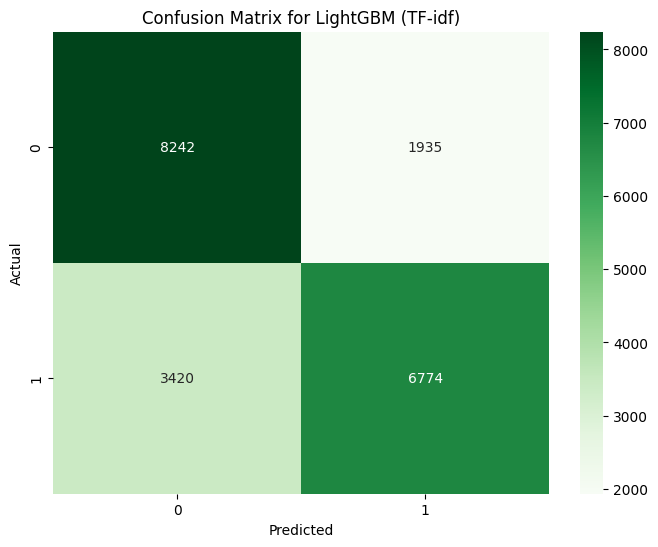

In [47]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, weighted_majority_vote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title(f"Confusion Matrix for LightGBM (TF-idf)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [48]:
# classification report
print("weight_majority_vote - Classification Report:")
print(classification_report(y_test, weighted_majority_vote))

weight_majority_vote - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.75     10177
           1       0.78      0.66      0.72     10194

    accuracy                           0.74     20371
   macro avg       0.74      0.74      0.74     20371
weighted avg       0.74      0.74      0.74     20371

